In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import roboticstoolbox as rtb
pi = 3.1415926          # 定义pi常数

l1 = 0.1045             # 定义第一连杆长度
l2 = 0.08285            # 定义第三连杆长度
l3 = 0.08285            # 定义第四连杆长度
l4 = 0.12842            # 定义第五连杆长度

# student version
# 用改进DH参数发表示机器人正运动学
# TODO: modify the dh param
dofbot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(a=0, d=l1,qlim=[-pi,pi]),
        rtb.RevoluteMDH(a=0,alpha=-pi/2, offset=-pi/2,qlim=[-pi/2,pi/2]),
        rtb.RevoluteMDH(a=l2,qlim=[-5*pi/6,5*pi/6]),
        rtb.RevoluteMDH(a=l3,offset=pi/2,qlim=[-100/180*pi,100/180*pi]),
        rtb.RevoluteMDH(d=l4, alpha=pi/2,qlim=[-pi,pi])
    ]
)

In [7]:
def extract_robot_data(text):
    # 将文本按行分割
    lines = text.split('\n')
    
    states = []
    targets = []
    gripper_targets = []  # 单独存储夹爪的目标值
    
    for line in lines:
        # 提取state数据
        if line.startswith('state:'):
            # 去除"state:"和方括号，分割数字
            data = line.replace('state:', '').replace('[', '').replace(']', '').strip()
            # 转换为浮点数数组
            numbers = [float(x) for x in data.split() if x.strip()]
            states.append(numbers[:5])  # 只取前5个关节角度
            
        # 提取目标位置(p)数据
        elif line.startswith('p:'):
            data = line.replace('p:', '').replace('[', '').replace(']', '').strip()
            try:
                if '[' not in line and ']' not in line:
                    # 单个数值（夹爪控制）
                    number = float(data)
                    gripper_targets.append(number)
                    states = states[:-1]
                else:
                    # 关节角度数组
                    numbers = [float(x) for x in data.split() if x.strip()]
                    if len(numbers) >= 5:  # 确保有足够的关节数据
                        targets.append(numbers[:5])  # 只取前5个关节角度
            except ValueError:
                continue
    
    # 转换为numpy数组
    states = np.array(states)
    targets = np.array(targets)
    gripper_targets = np.array(gripper_targets)
    
    return states, targets, gripper_targets

In [8]:
with open(r'./robot_control.txt', 'r') as file:
    text = file.read()
states, targets, gripper_targets = extract_robot_data(text)

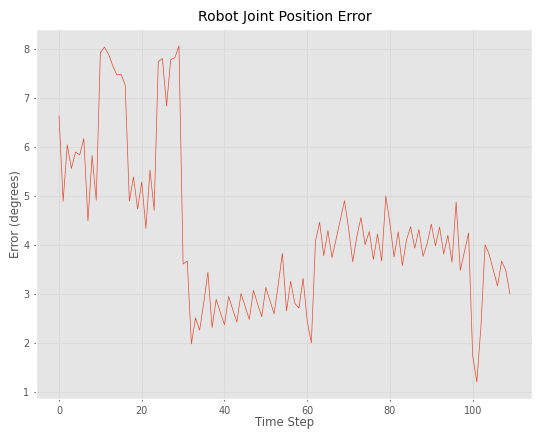

In [12]:
x = []
for i in range(len(states)):
    dx = np.linalg.norm(states[i]-targets[i])
    x.append(dx)
plt.plot(x)  # 绘制曲线
plt.xlabel('Time Step')  # 添加x轴标签
plt.ylabel('Error (degrees)')  # 添加y轴标签
plt.title('Robot Joint Position Error')  # 添加标题
plt.grid(True)  # 添加网格
plt.show()  # 显示图像